In [1]:
import pandas as pd

# Load metadata file of the full dataset, 
df = pd.read_csv("mm50_Image_data_cleaned.csv", encoding="ISO-8859-1", sep=";")

# Annotated outlier files
filter_annot = pd.read_csv("filter_annot.csv").set_index("Image File Name").astype(bool)

# Image feature vectors
feature_df = pd.read_parquet("mm50_features.parquet.gzip")

In [2]:
len(feature_df)

90380

In [3]:
from sklearn.preprocessing import normalize

def normalize_feature_df(df):
    X = df.values
    X = normalize(X, norm='l2', axis=1)
    return pd.DataFrame(data=X, index=df.index)
# feature_df = normalize_feature_df(feature_df)

In [4]:
for col in filter_annot.columns:
    print(col, filter_annot[col].sum())

Bubbles 22
Detached parts 324
Forceps 31
Misclassification 29


In [7]:
df["Species Name"].nunique()

24

In [5]:
print(len(filter_annot))

406


In [6]:
def is_outlier(s):
    if s in filter_annot.index:
        return True
    return False
df = df.loc[:,["Sample Name/Number",
        "Species Name",
        "Image File Name",
        "Area",
        "Sample Station"]]

df["specimen"] = df["Sample Name/Number"].apply(lambda x: x.split("_")[0])
df["camera"] = df["Image File Name"].apply(lambda x: x.split("_")[0])
df["camera_run"] = df.apply(lambda x: f'{x["Sample Name/Number"]}_{x["camera"]}', axis=1)
df = df.assign(is_outlier=df["Image File Name"].apply(is_outlier))

df = df.join(filter_annot, on="Image File Name")
for c in ["Bubbles", "Detached parts", "Forceps", "Misclassification"]:
    df[c] = df[c].fillna(False)
df

,Sample Name/Number,Species Name,Image File Name,Area,Sample Station,specimen,camera,camera_run,is_outlier,Bubbles,Detached parts,Forceps,Misclassification
0,A-A1-CaHo-haa1-1_1,Caenis_horaria,1_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-43-945.PNG,5508.0,haa1,A-A1-CaHo-haa1-1,1,A-A1-CaHo-haa1-1_1_1,False,False,False,False,False
1,A-A1-CaHo-haa1-1_1,Caenis_horaria,2_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-43-933.PNG,3154.0,haa1,A-A1-CaHo-haa1-1,2,A-A1-CaHo-haa1-1_1_2,False,False,False,False,False
2,A-A1-CaHo-haa1-1_1,Caenis_horaria,1_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-44-047.PNG,5527.0,haa1,A-A1-CaHo-haa1-1,1,A-A1-CaHo-haa1-1_1_1,False,False,False,False,False
3,A-A1-CaHo-haa1-1_1,Caenis_horaria,2_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-44-035.PNG,3115.0,haa1,A-A1-CaHo-haa1-1,2,A-A1-CaHo-haa1-1_1_2,False,False,False,False,False
4,A-A1-CaHo-haa1-1_1,Caenis_horaria,1_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-44-141.PNG,5556.0,haa1,A-A1-CaHo-haa1-1,1,A-A1-CaHo-haa1-1_1_1,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90375,Q-G12-CaHo-vii2-4_2,Caenis_horaria,2_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-541.PNG,4034.0,vii2,Q-G12-CaHo-vii2-4,2,Q-G12-CaHo-vii2-4_2_2,False,False,False,False,False
90376,Q-G12-CaHo-vii2-4_2,Caenis_horaria,1_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-624.PNG,3617.0,vii2,Q-G12-CaHo-vii2-4,1,Q-G12-CaHo-vii2-4_2_1,False,False,False,False,False
90377,Q-G12-CaHo-vii2-4_2,Caenis_horaria,2_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-637.PNG,4025.0,vii2,Q-G12-CaHo-vii2-4,2,Q-G12-CaHo-vii2-4_2_2,False,False,False,False,False
90378,Q-G12-CaHo-vii2-4_2,Caenis_horaria,1_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-719.PNG,3690.0,vii2,Q-G12-CaHo-vii2-4,1,Q-G12-CaHo-vii2-4_2_1,False,False,False,False,False


In [82]:
df["specimen"].nunique()

1518

In [84]:
df["Sample Name/Number"].nunique()

3107

In [7]:
import taxonomist_studio.tools as tools
from scipy.spatial.distance import cosine, pdist, euclidean
from scipy.linalg import norm
import numpy as np
from tqdm.notebook import tqdm


def outlier_detection_init(df, feature_df, col):
    """Find a filename->group map and apply it to a dataframe index
    
    Args:
        df (pd.DataFrame): The BioDiscover metadata dataframe
        feature_df (pd.DataFrame): The feature vector dataframe. Index is file name
        col (str): The column to map
    Returns:
        fname2group (dict): Mapping from file name to group
        group_index (pd.Index): feature_df index mapped to group
    """
    # Mapping from image file name to group
    fname2group = dict(zip(df["Image File Name"].values, df[col].values))

    # Remap the image-level features
    group_index = feature_df.index.map(lambda x: fname2group[x])
    return fname2group, group_index 

def calculate_mean_pairwise_distance(X):
    """Calculates the mean pairwise distances for matrix X
    If the matrix is too large, a random sample of 1000 rows is taken
    Calculates pairwise cosine distance between all rows in X and returns their mean
    
    Args:
        X (np.array): The feature matrix
    Returns:
        gd (float): The mean pairwise distance
    """
    if len(X.shape) == 2:
        if X.shape[0] > 1000:
            X = X[np.random.choice(np.arange(X.shape[0]), 1000, replace=False)]
        Xd = pdist(X, 'cosine')
        gd = Xd.mean() if len(Xd) > 1 else 1
        return gd
    return 1

def calculate_outlier_detection(df, feature_df, group_col, normalization_col):
    """Performs outlier detection based on cosine similarity to group mean vectors
    
    Args:
        df (pd.DataFrame): The BioDiscover metadata dataframe
        feature_df (pd.DataFrame): The feature vector dataframe. Index is file name
        group_col (str): The column to group by
        normalization_col (str): The column to normalize by
    Returns:
        df (pd.DataFrame): A dataframe ordered by cosine distances (or normalized distances if normalization_col is set)
    """

    feature_df = feature_df[feature_df.index.isin(df["Image File Name"])]
    group_features = tools.group_features(df,
                                          feature_df,
                                          group_col=group_col)
    fname2group, group_index = outlier_detection_init(df, feature_df, group_col)

    # Calculate group mean pairwise distances
    if normalization_col is not None:
        fname2normalizationgroup, normalization_index = outlier_detection_init(df, feature_df, normalization_col)
        glist = normalization_index.unique()
        n = len(glist)
        group_means = {}
        for i, g in tqdm(enumerate(glist), total=len(glist)):
            X = feature_df.iloc[np.where(normalization_index == g)[0]].values
            gd = calculate_mean_pairwise_distance(X)
            group_means[g] = gd

    
    # Calculate distances to the group mean
    d = []
    n = len(feature_df)
    for i, (fname, vec) in tqdm(enumerate(feature_df.iterrows()), total=len(feature_df)):
        group = fname2group[fname]
        group_mean_vec = group_features.loc[group]
        dg = cosine(vec.values, group_mean_vec)
        if normalization_col is not None:
            normalization_group = fname2normalizationgroup[fname]
            dg = dg / group_means[normalization_group]
        d.append(dg)

    d_series = pd.Series(d, index=feature_df.index)
    d_series.name = "cosine_distance"
    return df.join(d_series, on="Image File Name").sort_values(by="cosine_distance", ascending=False)

In [8]:
from sklearn.metrics import roc_curve, precision_recall_curve
def fpr_at_95(y_true, y_pred):
    roc = roc_curve(y_true, y_pred)
    fpr = roc[0]
    tpr = roc[1]
    return fpr[np.where(tpr > 0.95)[0][0]]

def tpr_at_head(y_true, y_pred):
    """how big percentage of the top 406 samples are true positives"""
    return y_true.head(y_true.sum()).sum()/y_true.sum()

def dataset_p_for_95recall(y_true, y_pred):
    """How big percentage of the dataset is needed to reach 95% recall"""
    pr = precision_recall_curve(y_true, y_pred)
    prec = pr[0]
    rec = pr[1]
    return np.where(rec[::-1]>0.95)[0][0]/len(rec)

def recall_at_5dataset_p(y_true, y_pred):
    """The recall when we have went through 95% of the dataset"""
    N_95p = int(len(y_true)*0.05)
    return y_true.head(N_95p).sum()/y_true.sum()


In [9]:
from sklearn.metrics import roc_auc_score, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay

annot_types = ["is_outlier", "Bubbles", "Forceps", "Detached parts", "Misclassification"]
def calc_metrics(df_sort, annot_types):
    dlist = []
    y_truelist = {}
    for annot_type in annot_types:
        y_true = df_sort[annot_type]*1
        preds = np.linspace(1,0,len(df_sort))

        auroc = roc_auc_score(y_true, preds)
        ap = average_precision_score(y_true, preds)
        fpr95 = fpr_at_95(y_true, preds)
        tpr_head = tpr_at_head(y_true, preds)
        p_for_95rec = dataset_p_for_95recall(y_true, preds)
        rec_at_5p = recall_at_5dataset_p(y_true, preds)
        d = {
            "annot_type": annot_type,
            "auroc": auroc,
            "ap": ap,
            "fpr95":fpr95,
            "tpr_head": tpr_head,
            "p_for_95rec": p_for_95rec,
            "rec_at_5p": rec_at_5p}
        dlist.append(d)
        y_truelist[annot_type] = y_true
    return dlist, y_truelist

def calculate_embedding_method(df, column, feature_df, normalization, annot_types):
    if normalization:
        norm_col = column
    else:
        norm_col = None
    df_sort = calculate_outlier_detection(df, feature_df, column, normalization_col=norm_col)
    assert len(df_sort) == len(df)

    dlist, y_truelist = calc_metrics(df_sort, annot_types=annot_types)

    for x in dlist:
        x["column"] = column
        x["normalization"] = normalization

    return dlist, y_truelist

In [10]:
# Embedding method for dataset 1
dlist = []
y_truelist= {}
for col in ["camera_run", "Sample Name/Number", "specimen", "Species Name"]:
    y_truelist[col] = {}
    for norm in [True, False]:
        d, y_true = calculate_embedding_method(df, col, feature_df, norm, annot_types)
        # d, y_true = None, None
        print(d)
        dlist.append(d)
        y_truelist[col][norm] = y_true

  0%|          | 0/6197 [00:00<?, ?it/s]

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.44997747570425656, 'ap': 0.028209619299386576, 'fpr95': 0.9918754306799742, 'tpr_head': 0.08620689655172414, 'p_for_95rec': 0.9916796671866874, 'rec_at_5p': 0.11822660098522167, 'column': 'camera_run', 'normalization': True}, {'annot_type': 'Bubbles', 'auroc': 0.4142693004996287, 'ap': 0.0002088357542037636, 'fpr95': 0.9989707607516767, 'tpr_head': 0.0, 'p_for_95rec': 0.9989488941259778, 'rec_at_5p': 0.0, 'column': 'camera_run', 'normalization': True}, {'annot_type': 'Forceps', 'auroc': 0.9789108114447952, 'ap': 0.25169698207594743, 'fpr95': 0.026541522319007405, 'tpr_head': 0.2903225806451613, 'p_for_95rec': 0.026864053285535677, 'rec_at_5p': 0.967741935483871, 'column': 'camera_run', 'normalization': True}, {'annot_type': 'Detached parts', 'auroc': 0.4002200071395905, 'ap': 0.003812298343861198, 'fpr95': 0.9918384116549702, 'tpr_head': 0.021604938271604937, 'p_for_95rec': 0.9916796671866874, 'rec_at_5p': 0.04938271604938271, 'column': 'camera_

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.42660049794352195, 'ap': 0.026291362178274845, 'fpr95': 0.9988552248427324, 'tpr_head': 0.07389162561576355, 'p_for_95rec': 0.9986280302275921, 'rec_at_5p': 0.16748768472906403, 'column': 'camera_run', 'normalization': False}, {'annot_type': 'Bubbles', 'auroc': 0.9824435729391572, 'ap': 0.01608528375066036, 'fpr95': 0.05515837003917749, 'tpr_head': 0.0, 'p_for_95rec': 0.05537668315243248, 'rec_at_5p': 0.8636363636363636, 'column': 'camera_run', 'normalization': False}, {'annot_type': 'Forceps', 'auroc': 0.9265425577304354, 'ap': 0.026667454338355392, 'fpr95': 0.3036668917198862, 'tpr_head': 0.06451612903225806, 'p_for_95rec': 0.30389130458835373, 'rec_at_5p': 0.6774193548387096, 'column': 'camera_run', 'normalization': False}, {'annot_type': 'Detached parts', 'auroc': 0.35348889908830394, 'ap': 0.018787898466366942, 'fpr95': 0.9989117882206627, 'tpr_head': 0.021604938271604937, 'p_for_95rec': 0.9987276086788153, 'rec_at_5p': 0.08641975308641975,

  0%|          | 0/3107 [00:00<?, ?it/s]

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.4080888009135863, 'ap': 0.012925077689044426, 'fpr95': 0.9984773378976148, 'tpr_head': 0.04433497536945813, 'p_for_95rec': 0.9982518449674157, 'rec_at_5p': 0.08620689655172414, 'column': 'Sample Name/Number', 'normalization': True}, {'annot_type': 'Bubbles', 'auroc': 0.4851021894725828, 'ap': 0.00024409793012743347, 'fpr95': 0.9147502158082295, 'tpr_head': 0.0, 'p_for_95rec': 0.9147497814806209, 'rec_at_5p': 0.0, 'column': 'Sample Name/Number', 'normalization': True}, {'annot_type': 'Forceps', 'auroc': 0.9294088621935227, 'ap': 0.0281975361643956, 'fpr95': 0.38729814386434824, 'tpr_head': 0.06451612903225806, 'p_for_95rec': 0.3874929465263717, 'rec_at_5p': 0.6129032258064516, 'column': 'Sample Name/Number', 'normalization': True}, {'annot_type': 'Detached parts', 'auroc': 0.345668182321672, 'ap': 0.006762364754279935, 'fpr95': 0.9987452251932131, 'tpr_head': 0.027777777777777776, 'p_for_95rec': 0.9985616445934433, 'rec_at_5p': 0.0493827160493827

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.3038980828725452, 'ap': 0.0221377148554467, 'fpr95': 0.9999555427123391, 'tpr_head': 0.046798029556650245, 'p_for_95rec': 0.9997233931910467, 'rec_at_5p': 0.13054187192118227, 'column': 'Sample Name/Number', 'normalization': False}, {'annot_type': 'Bubbles', 'auroc': 0.977091629457773, 'ap': 0.009806213184221351, 'fpr95': 0.057327519422740655, 'tpr_head': 0.0, 'p_for_95rec': 0.05754528053462564, 'rec_at_5p': 0.8181818181818182, 'column': 'Sample Name/Number', 'normalization': False}, {'annot_type': 'Forceps', 'auroc': 0.9685092110557663, 'ap': 0.02390811712494898, 'fpr95': 0.142923552003896, 'tpr_head': 0.0967741935483871, 'p_for_95rec': 0.14320487713125546, 'rec_at_5p': 0.8064516129032258, 'column': 'Sample Name/Number', 'normalization': False}, {'annot_type': 'Detached parts', 'auroc': 0.19755889887992878, 'ap': 0.017517719925107866, 'fpr95': 0.9999666873945101, 'tpr_head': 0.015432098765432098, 'p_for_95rec': 0.9997787145528374, 'rec_at_5p': 

  0%|          | 0/1518 [00:00<?, ?it/s]

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.41194098108911814, 'ap': 0.04173118425024573, 'fpr95': 0.9924533754195657, 'tpr_head': 0.07635467980295567, 'p_for_95rec': 0.9922550093493101, 'rec_at_5p': 0.11822660098522167, 'column': 'specimen', 'normalization': True}, {'annot_type': 'Bubbles', 'auroc': 0.9957316251114255, 'ap': 0.3230547374669809, 'fpr95': 0.01645676088448173, 'tpr_head': 0.3181818181818182, 'p_for_95rec': 0.01668492271605758, 'rec_at_5p': 1.0, 'column': 'specimen', 'normalization': True}, {'annot_type': 'Forceps', 'auroc': 0.9052398601980349, 'ap': 0.01432156728020889, 'fpr95': 0.3512933181330175, 'tpr_head': 0.03225806451612903, 'p_for_95rec': 0.3515008685453801, 'rec_at_5p': 0.5483870967741935, 'column': 'specimen', 'normalization': True}, {'annot_type': 'Detached parts', 'auroc': 0.3271584032212604, 'ap': 0.007151756057429699, 'fpr95': 0.9957470906991206, 'tpr_head': 0.018518518518518517, 'p_for_95rec': 0.9955742910567487, 'rec_at_5p': 0.027777777777777776, 'column': 's

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.66888228575283, 'ap': 0.08085322634031245, 'fpr95': 0.9671682930624402, 'tpr_head': 0.08620689655172414, 'p_for_95rec': 0.9670837897345681, 'rec_at_5p': 0.20935960591133004, 'column': 'specimen', 'normalization': False}, {'annot_type': 'Bubbles', 'auroc': 0.9999466767544857, 'ap': 0.7368657864419232, 'fpr95': 0.00011067088691648774, 'tpr_head': 0.7727272727272727, 'p_for_95rec': 0.0003429924431019794, 'rec_at_5p': 1.0, 'column': 'specimen', 'normalization': False}, {'annot_type': 'Forceps', 'auroc': 0.9448675548116462, 'ap': 0.01063641590772376, 'fpr95': 0.14098661855692923, 'tpr_head': 0.0, 'p_for_95rec': 0.141268629468583, 'rec_at_5p': 0.4838709677419355, 'column': 'specimen', 'normalization': False}, {'annot_type': 'Detached parts', 'auroc': 0.6369803027910205, 'ap': 0.012257294427962572, 'fpr95': 0.9783801190370436, 'tpr_head': 0.018518518518518517, 'p_for_95rec': 0.9782697690886358, 'rec_at_5p': 0.14814814814814814, 'column': 'specimen', 'n

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.9010632628298422, 'ap': 0.09752412928160403, 'fpr95': 0.36623913575032785, 'tpr_head': 0.10344827586206896, 'p_for_95rec': 0.3688607118752835, 'rec_at_5p': 0.4852216748768473, 'column': 'Species Name', 'normalization': True}, {'annot_type': 'Bubbles', 'auroc': 0.9995366914234087, 'ap': 0.7571699621965304, 'fpr95': 0.002910644325903628, 'tpr_head': 0.6818181818181818, 'p_for_95rec': 0.0031422533497084564, 'rec_at_5p': 1.0, 'column': 'Species Name', 'normalization': True}, {'annot_type': 'Forceps', 'auroc': 0.9159556543996595, 'ap': 0.007125220970029713, 'fpr95': 0.3102524654395732, 'tpr_head': 0.03225806451612903, 'p_for_95rec': 0.31047454664144014, 'rec_at_5p': 0.5483870967741935, 'column': 'Species Name', 'normalization': True}, {'annot_type': 'Detached parts', 'auroc': 0.9248491267984695, 'ap': 0.04172033195644608, 'fpr95': 0.2771830860797726, 'tpr_head': 0.030864197530864196, 'p_for_95rec': 0.2795941624899039, 'rec_at_5p': 0.4876543209876543,

  0%|          | 0/90380 [00:00<?, ?it/s]

[{'annot_type': 'is_outlier', 'auroc': 0.8994560661804762, 'ap': 0.14371914265443597, 'fpr95': 0.5387445261964567, 'tpr_head': 0.16995073891625614, 'p_for_95rec': 0.5405892831457939, 'rec_at_5p': 0.625615763546798, 'column': 'Species Name', 'normalization': False}, {'annot_type': 'Bubbles', 'auroc': 0.999718292287849, 'ap': 0.8097384999824023, 'fpr95': 0.0018260696341220479, 'tpr_head': 0.7727272727272727, 'p_for_95rec': 0.0020579546586118763, 'rec_at_5p': 1.0, 'column': 'Species Name', 'normalization': False}, {'annot_type': 'Forceps', 'auroc': 0.9099067094303488, 'ap': 0.012977756769429447, 'fpr95': 0.4131202337601966, 'tpr_head': 0.03225806451612903, 'p_for_95rec': 0.4133058939378852, 'rec_at_5p': 0.5806451612903226, 'column': 'Species Name', 'normalization': False}, {'annot_type': 'Detached parts', 'auroc': 0.9429502781259838, 'ap': 0.0655538306548947, 'fpr95': 0.2414497645909212, 'tpr_head': 0.11419753086419752, 'p_for_95rec': 0.24398933404144676, 'rec_at_5p': 0.6604938271604939, 

In [11]:
dlist_flat = [item for sublist in dlist for item in sublist]
dlist_flat

[{'annot_type': 'is_outlier',
  'auroc': 0.44997747570425656,
  'ap': 0.028209619299386576,
  'fpr95': 0.9918754306799742,
  'tpr_head': 0.08620689655172414,
  'p_for_95rec': 0.9916796671866874,
  'rec_at_5p': 0.11822660098522167,
  'column': 'camera_run',
  'normalization': True},
 {'annot_type': 'Bubbles',
  'auroc': 0.4142693004996287,
  'ap': 0.0002088357542037636,
  'fpr95': 0.9989707607516767,
  'tpr_head': 0.0,
  'p_for_95rec': 0.9989488941259778,
  'rec_at_5p': 0.0,
  'column': 'camera_run',
  'normalization': True},
 {'annot_type': 'Forceps',
  'auroc': 0.9789108114447952,
  'ap': 0.25169698207594743,
  'fpr95': 0.026541522319007405,
  'tpr_head': 0.2903225806451613,
  'p_for_95rec': 0.026864053285535677,
  'rec_at_5p': 0.967741935483871,
  'column': 'camera_run',
  'normalization': True},
 {'annot_type': 'Detached parts',
  'auroc': 0.4002200071395905,
  'ap': 0.003812298343861198,
  'fpr95': 0.9918384116549702,
  'tpr_head': 0.021604938271604937,
  'p_for_95rec': 0.991679667

In [12]:
results = pd.DataFrame(dlist_flat).set_index(["column", "normalization", "annot_type"]).stack().reset_index().rename(columns={"level_3": "metric",
                                                                                                 0: "value"})
results

,column,normalization,annot_type,metric,value
0,camera_run,True,is_outlier,auroc,0.449977
1,camera_run,True,is_outlier,ap,0.028210
2,camera_run,True,is_outlier,fpr95,0.991875
3,camera_run,True,is_outlier,tpr_head,0.086207
4,camera_run,True,is_outlier,p_for_95rec,0.991680
...,...,...,...,...,...
235,Species Name,False,Misclassification,ap,0.000225
236,Species Name,False,Misclassification,fpr95,0.876349
237,Species Name,False,Misclassification,tpr_head,0.000000
238,Species Name,False,Misclassification,p_for_95rec,0.876368


In [13]:
# Dataset 2
image_data_complete = pd.read_csv("D:\data\ept_dataset\image data complete.csv")
image_data_with_DNA = pd.read_csv("D:\data\ept_dataset\image_data_with_DNA.csv")
image_data_with_DNA_clean_complete = pd.read_csv("D:\data\ept_dataset\image_data_with_DNA_clean_complete.csv")
image_data_with_DNA_new = pd.read_csv("D:\data\ept_dataset\image_data_with_DNA_new.csv", encoding="ISO-8859-1", sep=";")
ept_features = pd.read_parquet("D:\data\ept_dataset\ept.parquet.gzip")

print(len(image_data_complete), 
      len(image_data_with_DNA), 
      len(image_data_with_DNA_clean_complete), 
      len(image_data_with_DNA_new))

184851 163522 154094 163519


In [14]:
# ept_features = normalize_feature_df(ept_features)

In [15]:
len(image_data_with_DNA_new)

163519

In [16]:
outlier_set = set(image_data_with_DNA_new["Image File Name"]) - set(image_data_with_DNA_clean_complete["Image File Name"])
len(outlier_set)

9425

In [17]:
# Assign outlier column and specimen
ept_df = image_data_with_DNA_new.assign(is_outlier=image_data_with_DNA_new["Image File Name"].apply(lambda x: x in outlier_set))
ept_df = ept_df[["Sample Name/Number", "Label_DNA", "Image File Name", "Area", "is_outlier"]].rename(columns={"Label_DNA": "Species Name"})
ept_df = ept_df.assign(specimen=ept_df["Sample Name/Number"].apply(lambda x: "_".join(x.split("_")[:-1])))
ept_df

,Sample Name/Number,Species Name,Image File Name,Area,is_outlier,specimen
0,4_F12_1,Goera pilosa,1_4_F12_1_2023_12_14-09-51-53-989.PNG,25295,False,4_F12
1,4_F12_1,Goera pilosa,2_4_F12_1_2023_12_14-09-51-54-000.PNG,28245,False,4_F12
2,4_F12_1,Goera pilosa,1_4_F12_1_2023_12_14-09-51-54-013.PNG,28301,False,4_F12
3,4_F12_1,Goera pilosa,2_4_F12_1_2023_12_14-09-51-54-025.PNG,29520,False,4_F12
4,4_F12_2,Goera pilosa,1_4_F12_2_2023_12_14-09-52-19-798.PNG,16395,False,4_F12
...,...,...,...,...,...,...
163514,10_C11_2,Nemoura cinerea,2_10_C11_2_2024_01_16-10-35-14-108.PNG,4764,False,10_C11
163515,10_C11_2,Nemoura cinerea,1_10_C11_2_2024_01_16-10-35-14-168.PNG,4634,False,10_C11
163516,10_C11_2,Nemoura cinerea,2_10_C11_2_2024_01_16-10-35-14-132.PNG,4750,False,10_C11
163517,10_C11_2,Nemoura cinerea,1_10_C11_2_2024_01_16-10-35-14-190.PNG,4645,False,10_C11


In [83]:
ept_df["specimen"].nunique()

743

In [85]:
ept_df["Sample Name/Number"].nunique()

2677

In [18]:
# Filter the feature embeddings to match the ept_df
ept_features = ept_features[ept_features.index.isin(ept_df["Image File Name"])]

In [19]:
# Running embedding method with the second dataset
d, y_true = calculate_embedding_method(ept_df, "Species Name", ept_features, False, annot_types=["is_outlier"])
results_ds2 = pd.DataFrame(d).set_index(["column", "normalization", "annot_type"]).stack().reset_index().rename(columns={"level_3": "metric",
                                                                                                    0: "value"})
results_ds2

  0%|          | 0/163519 [00:00<?, ?it/s]

,column,normalization,annot_type,metric,value
0,Species Name,False,is_outlier,auroc,0.827161
1,Species Name,False,is_outlier,ap,0.159869
2,Species Name,False,is_outlier,fpr95,0.459700
3,Species Name,False,is_outlier,tpr_head,0.062918
4,Species Name,False,is_outlier,p_for_95rec,0.487959
5,Species Name,False,is_outlier,rec_at_5p,0.055491


In [20]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

def dist_from_line(x,y, a,b,c):
    """
    x,y: the point
    a,b,c: line coefficients, a*x + b*y + c = 0

    returns the signed distance from the line
    """
    d = (np.abs(a*x + b*y + c)) / (np.sqrt( a**2 + b**2))
    if y > (-a*x - c)/b:
        return d
    return -d

def ransac_ranker(df):
    """
    Re-orders the df based on the relative area difference among the largest and smallest are of the specimen
    The motivation is that if the image sequence contains images from the same specimen, all areas should be close
    to the mean. When the images contain debree, legs etc. the size difference between specimen and outlier images
    is large.

    Args:
        df (pd.DataFrame): The BioDiscover metadata dataframe
    
    Returns:
    """

    # Calculate the relative differences between area
    x = np.log(df.groupby("specimen")["Area"].mean())
    y = np.log(df.groupby("specimen")["Area"].agg(lambda x: ((x.max()-x.min()))/x.mean()))
    y.loc[y == -np.inf] = 0

    # Calculate RANSAC regression line and it's coefficients
    ransac = RANSACRegressor()
    ransac.fit(x.values.reshape(-1,1), y.values)

    a = ransac.estimator_.coef_
    b = -1
    c = ransac.estimator_.intercept_

    # Calculate signed distance from the RANSAC line
    d = [dist_from_line(x,y ,a,b,c)[0] for x,y in zip(x.values, y.values)]

    d_series = pd.Series(data=d, index=x.index)
    d_series.name = "area_difference"
    return d_series, y
    

In [21]:

def specimen_outlier_split(specimen, df, species_mean_areas):
    specimen_df = df[df["specimen"] == specimen]
    if len(specimen_df) == 1:
        return specimen_df.index, []
    species = specimen_df["Species Name"].iloc[0]

    a = specimen_df.sort_values("Area")["Area"]
    da = np.diff(a)
    a_small = a.iloc[:np.argmax(da)+1]
    a_large = a.iloc[np.argmax(da)+1:]

    diff_to_species_small = np.abs(species_mean_areas[species] - np.mean(a_small))
    diff_to_species_large = np.abs(species_mean_areas[species] - np.mean(a_large))

    if diff_to_species_small < diff_to_species_large:
        outliers = a_large
        inliers = a_small
    else:
        outliers = a_small
        inliers = a_large

    output = outliers.index, inliers.index
    return output


In [22]:
def size_comparison_method(df):
    d_series, y = ransac_ranker(df)
    species_mean_areas = df.groupby("Species Name")["Area"].mean()
    outlier_inlier = [specimen_outlier_split(sp, df, species_mean_areas) for sp in tqdm(d_series.sort_values(ascending=False).index)]

    outlier_inds, inlier_inds = list(zip(*outlier_inlier))
    outlier_inds = [item for sublist in outlier_inds for item in sublist]
    inlier_inds = [item for sublist in inlier_inds for item in sublist]

    d_out = df.loc[outlier_inds + inlier_inds]
    assert len(d_out) == len(df)
    return d_out

df_sort_size_ds1 = size_comparison_method(df)
df_sort_size_ds2 = size_comparison_method(ept_df)

  0%|          | 0/1518 [00:00<?, ?it/s]

d:\miniforge3\envs\bd-studio\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


  0%|          | 0/743 [00:00<?, ?it/s]

In [23]:
# Sorting by the size comparison method
dlist, y_truelist = calc_metrics(df_sort_size_ds1, annot_types=annot_types)

size_results = pd.DataFrame(dlist).set_index("annot_type").stack().reset_index().rename(columns={"level_1": "metric", 0: "value"})
size_results = size_results.assign(normalization=None).assign(column='None')

In [24]:
# Sorting by the size comparison method for dataset 2
dlist_ds2, y_truelist = calc_metrics(df_sort_size_ds2, annot_types=["is_outlier"])

size_results_ds2 = pd.DataFrame(dlist_ds2).set_index("annot_type").stack().reset_index().rename(columns={"level_1": "metric", 0: "value"})
size_results_ds2 = size_results_ds2.assign(normalization=None).assign(column='None')

In [25]:
df_sort_embedding_ds1 = calculate_outlier_detection(df, feature_df, 'Species Name', normalization_col=None)
df_sort_embedding_ds2 = calculate_outlier_detection(ept_df, ept_features, 'Species Name', normalization_col=None)

  0%|          | 0/90380 [00:00<?, ?it/s]

  0%|          | 0/163519 [00:00<?, ?it/s]

In [26]:
def hybrid_ranking(df_a, df_b):
     ranking_a = df_a["Image File Name"].reset_index(drop=True).reset_index().set_index("Image File Name")
     ranking_b = df_b["Image File Name"].reset_index(drop=True).reset_index().set_index("Image File Name")

     hybrid = ranking_a.join(ranking_b, lsuffix='_size', rsuffix='_embedding')
     hybrid["min_ranking"] = hybrid.apply(lambda x: min(x["index_size"], x["index_embedding"]), axis=1)
     hybrid["second_ranking"] = hybrid.apply(lambda x: max(x["index_size"], x["index_embedding"]), axis=1)
     return hybrid.sort_values(["min_ranking", "second_ranking"]).index

hybrid_ds1 = hybrid_ranking(df_sort_size_ds1, df_sort_embedding_ds1)
hybrid_ds2 = hybrid_ranking(df_sort_size_ds2, df_sort_embedding_ds2)
hybrid_ds1

Index(['1_Q-G9-KaFu-vii1-7_3_2023_05_23-14-45-38-163.PNG',
       '2_N-B9-OuTu-nie2-3_2_2023_05_19-14-08-23-220.PNG',
       '2_Q-G9-KaFu-vii1-7_3_2023_05_23-14-45-38-307.PNG',
       '1_N-B9-OuTu-nie2-3_2_2023_05_19-14-08-23-407.PNG',
       '2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-143.PNG',
       '2_Q-G9-KaFu-vii1-7_3_2023_05_23-14-45-37-940.PNG',
       '2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-089.PNG',
       '1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-104.PNG',
       '2_N-B9-OuTu-nie2-3_2_2023_05_19-14-08-23-616.PNG',
       '2_H-D1-RaBa-kaj1-1_5_2023_05_15-13-42-15-672.PNG',
       ...
       '2_Q-A6-OuTuAd-koy1-12_2_2023_05_23-10-55-47-802.PNG',
       '2_Q-A6-OuTuAd-koy1-12_2_2023_05_23-10-55-47-949.PNG',
       '2_Q-A6-OuTuAd-koy1-12_1_2023_05_23-10-55-24-209.PNG',
       '2_Q-A6-OuTuAd-koy1-12_2_2023_05_23-10-55-48-044.PNG',
       '2_Q-A6-OuTuAd-koy1-12_2_2023_05_23-10-55-47-996.PNG',
       '2_Q-A6-OuTuAd-koy1-12_2_2023_05_23-10-55-47-851.PNG',
       '2_Q-A6-OuTuAd-ko

In [27]:
dlist_hybrid_ds1,_ = calc_metrics(df_sort_size_ds1.set_index("Image File Name").loc[hybrid_ds1], annot_types=annot_types)
results_hybrid = pd.DataFrame(dlist_hybrid_ds1).assign(normalization=None).assign(column='Species Name')
results_hybrid = results_hybrid.set_index(["column", "normalization", "annot_type"]).stack().reset_index().rename(columns={"level_3": "metric",
                                                                                                 0: "value"})
results_hybrid

,column,normalization,annot_type,metric,value
0,Species Name,NaN,is_outlier,auroc,0.976166
1,Species Name,NaN,is_outlier,ap,0.561297
2,Species Name,NaN,is_outlier,fpr95,0.053104
3,Species Name,NaN,is_outlier,tpr_head,0.539409
4,Species Name,NaN,is_outlier,p_for_95rec,0.057136
5,Species Name,NaN,is_outlier,rec_at_5p,0.945813
6,Species Name,NaN,Bubbles,auroc,0.999401
7,Species Name,NaN,Bubbles,ap,0.680619
8,Species Name,NaN,Bubbles,fpr95,0.003597
9,Species Name,NaN,Bubbles,tpr_head,0.636364


In [28]:
# Baseline by just comparing the area to the mean area of the specimen

def calculate_baseline(df, name, annot_types):
    df_sort_baseline = (df.join(df.groupby("specimen")["Area"]
                                  .mean()
                                  .rename("Area_mean"),
                                on="specimen")
            .assign(area_diff=lambda x: np.abs(x["Area"] - x["Area_mean"])/x["Area_mean"])
            .sort_values("area_diff", ascending=False)
    )
    df_sort_baseline
    dlist, y_truelist = calc_metrics(df_sort_baseline, annot_types)

    baseline_results = pd.DataFrame(dlist).set_index("annot_type").stack().reset_index().rename(columns={"level_1": "metric", 0: "value"})
    baseline_results = baseline_results.assign(normalization=None).assign(column='None')
    return baseline_results

baseline_ds1 = calculate_baseline(df, "baseline", annot_types=annot_types)
baseline_ds2 = calculate_baseline(ept_df, "baseline", annot_types=["is_outlier"])

In [29]:
baseline_ds1

,annot_type,metric,value,normalization,column
0,is_outlier,auroc,0.952797,None,None
1,is_outlier,ap,0.440381,None,None
2,is_outlier,fpr95,0.391491,None,None
3,is_outlier,tpr_head,0.559113,None,None
4,is_outlier,p_for_95rec,0.393999,None,None
5,is_outlier,rec_at_5p,0.916256,None,None
6,Bubbles,auroc,0.979444,None,None
7,Bubbles,ap,0.291650,None,None
8,Bubbles,fpr95,0.049603,None,None
9,Bubbles,tpr_head,0.272727,None,None


In [30]:
results = results.assign(method="embedding",
                         dataset="ds1")
results_ds2 = results_ds2.assign(method="embedding",
                         dataset="ds2")

size_results = size_results.assign(method="size_comparison",
                                   dataset="ds1")
size_results_ds2 = size_results_ds2.assign(method="size_comparison",
                                   dataset="ds2")

baseline_ds1 = baseline_ds1.assign(method="baseline",
                                      dataset="ds1")
baseline_ds2 = baseline_ds2.assign(method="baseline",
                                        dataset="ds2")

In [31]:
full_results = pd.concat((results, results_ds2, size_results, size_results_ds2, baseline_ds1, baseline_ds2)).reset_index(drop=True)
full_results["normalization"] = full_results["normalization"].map({False: "False", True: "True", None: "None"})

In [32]:
full_results

,column,normalization,annot_type,metric,value,method,dataset
0,camera_run,True,is_outlier,auroc,0.449977,embedding,ds1
1,camera_run,True,is_outlier,ap,0.028210,embedding,ds1
2,camera_run,True,is_outlier,fpr95,0.991875,embedding,ds1
3,camera_run,True,is_outlier,tpr_head,0.086207,embedding,ds1
4,camera_run,True,is_outlier,p_for_95rec,0.991680,embedding,ds1
...,...,...,...,...,...,...,...
313,None,None,is_outlier,ap,0.560809,baseline,ds2
314,None,None,is_outlier,fpr95,0.338942,baseline,ds2
315,None,None,is_outlier,tpr_head,0.777507,baseline,ds2
316,None,None,is_outlier,p_for_95rec,0.374162,baseline,ds2


In [33]:
full_results.groupby(["method", "dataset", "annot_type", "column"]).size()

method           dataset  annot_type         column            
baseline         ds1      Bubbles            None                   6
                          Detached parts     None                   6
                          Forceps            None                   6
                          Misclassification  None                   6
                          is_outlier         None                   6
                 ds2      is_outlier         None                   6
embedding        ds1      Bubbles            Sample Name/Number    12
                                             Species Name          12
                                             camera_run            12
                                             specimen              12
                          Detached parts     Sample Name/Number    12
                                             Species Name          12
                                             camera_run            12
                          

In [34]:
group_categories = pd.CategoricalDtype(categories=['camera_run',
                                                   'Sample Name/Number',
                                                   'specimen',
                                                   'Species Name'],
                                        ordered=True)

embedding_results = full_results.query("method == 'embedding' and dataset == 'ds1'")
embedding_results = embedding_results.assign(column=embedding_results["column"].astype(group_categories))
embedding_results

,column,normalization,annot_type,metric,value,method,dataset
0,camera_run,True,is_outlier,auroc,0.449977,embedding,ds1
1,camera_run,True,is_outlier,ap,0.028210,embedding,ds1
2,camera_run,True,is_outlier,fpr95,0.991875,embedding,ds1
3,camera_run,True,is_outlier,tpr_head,0.086207,embedding,ds1
4,camera_run,True,is_outlier,p_for_95rec,0.991680,embedding,ds1
...,...,...,...,...,...,...,...
235,Species Name,False,Misclassification,ap,0.000225,embedding,ds1
236,Species Name,False,Misclassification,fpr95,0.876349,embedding,ds1
237,Species Name,False,Misclassification,tpr_head,0.000000,embedding,ds1
238,Species Name,False,Misclassification,p_for_95rec,0.876368,embedding,ds1


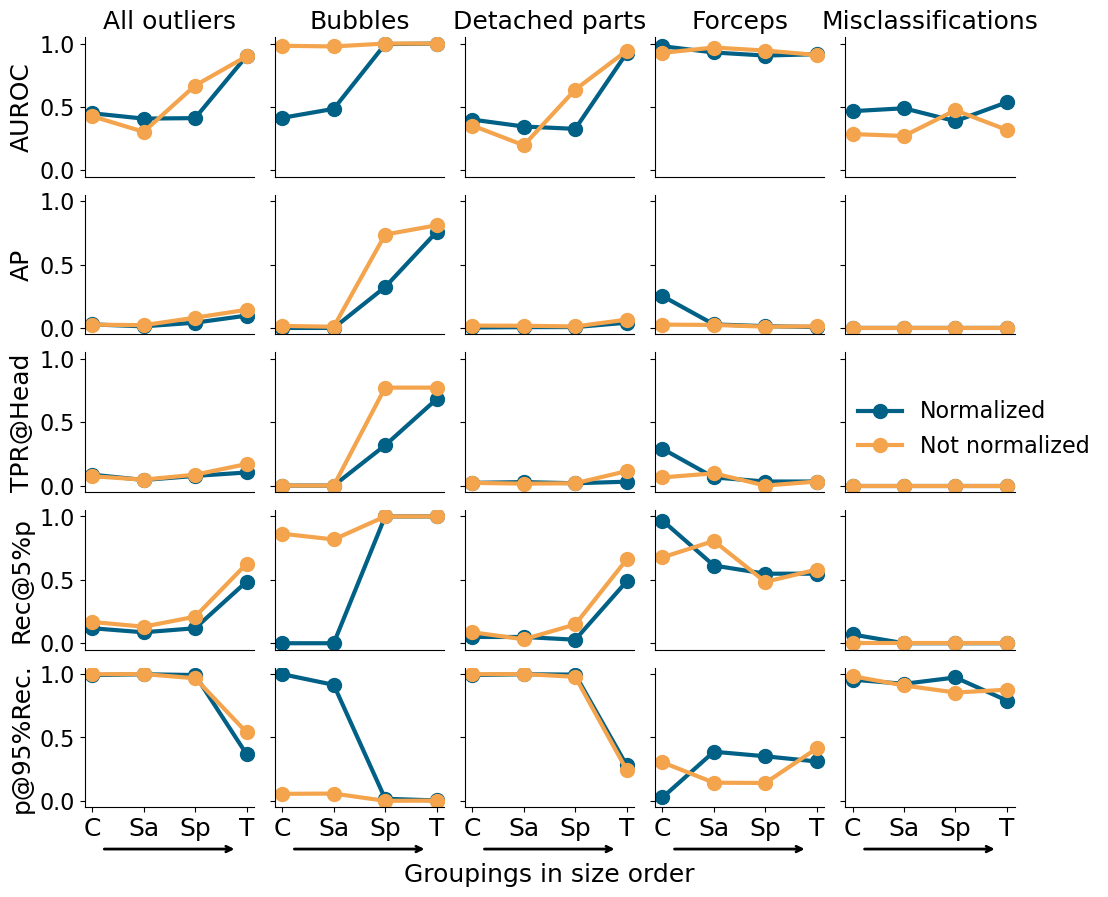

In [81]:
import matplotlib.pyplot as plt

colors = {
    "lightgreen": "#C7E3D2",
    "lightblue": "#CFE9EA",
    "lightyellow": "#FED992",
    "lightred": "#FCD9C9",
    "green": "#84C497",
    "blue": "#64C1CB",
    "yellow": "#F3A44C",
    "red": "#F28E77",
    "gray": "#E4E3DE",
    "darkgreen": "#005854",
    "darkblue": "#006085",
    "darkyellow": "#bb5b0f",
    "darkred": "#B34733",
    "darkgray": "#575756"
}


fig, ax = plt.subplots(5,5, figsize=(12,10), sharey=True, sharex=True)

def plot_metric(data, ax):
    linewidth = 3
    markersize=10
    ax.plot(data.query("normalization == 'True'")["value"].values,
        "o-",
        linewidth=linewidth,
        markersize=markersize,
        color=colors["darkblue"],
        label="Normalized")
    ax.plot(data.query("normalization == 'False'")["value"].values,
        "o-",
        linewidth=linewidth,
        markersize=markersize,
        color=colors["yellow"],
        label="Not normalized")
    ax.set_xticks(range(4))
    # ax.set_xticklabels(["C", "Sa", "Sp", "T"], rotation=0, rotation_mode="anchor", ha="right")
    ax.set_xticklabels(["C", "Sa", "Sp", "T"])
    ax.set_yticks([0, 0.5, 1.0])
    ax.tick_params(top=False,
               bottom=False,
               left=True,
               right=False)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=18)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


for rowi, metric in enumerate(['auroc', 'ap', 'tpr_head', 'rec_at_5p', 'p_for_95rec',]):
    for coli, annot_type in enumerate(['is_outlier', 'Bubbles', 'Detached parts', 'Forceps', 'Misclassification']):
        data = embedding_results.query("metric == @metric and annot_type == @annot_type").sort_values("column")
        plot_metric(data, ax[rowi,coli])


for i in range(5):
    ax[4, i].tick_params(bottom=True)
    ax[4, i].annotate("",
                      xy=(0.9, -0.3),
                      xytext=(0.1, -0.3),
                      xycoords='axes fraction',
                      arrowprops=dict(arrowstyle="->", facecolor="black", lw=2))

y_fontsize = 18
ax[0,0].set_ylabel("AUROC", fontsize=y_fontsize)
ax[1,0].set_ylabel("AP", fontsize=y_fontsize)
ax[2,0].set_ylabel("TPR@Head", fontsize=y_fontsize)
ax[3,0].set_ylabel("Rec@5%p", fontsize=y_fontsize)
ax[4,0].set_ylabel("p@95%Rec.", fontsize=y_fontsize)

ax[4,2].set_xlabel("Groupings in size order", fontsize=y_fontsize)
ax[4,2].xaxis.set_label_coords(0.5, -0.4)

x_fontsize = 18
ax[0,0].set_title("All outliers", fontsize=x_fontsize)
ax[0,1].set_title("Bubbles", fontsize=x_fontsize)
ax[0,2].set_title("Detached parts", fontsize=x_fontsize)
ax[0,3].set_title("Forceps", fontsize=x_fontsize)
ax[0,4].set_title("Misclassifications", fontsize=x_fontsize)
ax[2,4].legend(fontsize=16, frameon=False, bbox_to_anchor=(-0.04, 0.8), loc="upper left")
fig.subplots_adjust(hspace=0.13, wspace=0.12)
plt.savefig("outlier_detection_results.pdf", dpi=300, bbox_inches="tight")

In [36]:
result_table_ds1 = (full_results.query("dataset == 'ds1'")
             .query("column == 'Species Name' or column == 'None'")
             .query("normalization == 'None' or normalization == 'False'")
             .query("method != 'size_comparison'")
             .drop(columns=["dataset", "normalization", "column"])
             .rename(columns={"annot_type": "Outlier type",
                              "method": "Method"})     
)

# Rename values
m = {"is_outlier": "All outliers",
     "baseline": "Size",
     "embedding": "Embedding",
     "size_comparison": "Size_delta"}
result_table_ds1["Outlier type"] = result_table_ds1["Outlier type"].map(lambda x: m[x] if x in m else x)
result_table_ds1["Method"] = result_table_ds1["Method"].map(lambda x: m[x] if x in m else x)

# Pivot
result_table_ds1 = result_table_ds1.pivot(index=["Outlier type", "Method"], columns="metric", values="value")
result_table_ds1 = result_table_ds1.drop(columns="fpr95").loc[["All outliers", "Bubbles", "Detached parts", "Forceps", "Misclassification"],
                                       ["auroc", "ap", "tpr_head", "rec_at_5p", "p_for_95rec"]]

result_table_ds1.columns = ["AUROC", "AP", "TPR@Head", "Rec@5%p", "p@95%Rec."]
result_table_ds1*100

AUROC         AP   TPR@Head     Rec@5%p  \
Outlier type      Method                                                   
All outliers      Embedding  89.945607  14.371914  16.995074   62.561576   
                  Size       95.279685  44.038117  55.911330   91.625616   
Bubbles           Embedding  99.971829  80.973850  77.272727  100.000000   
                  Size       97.944389  29.164958  27.272727   95.454545   
Detached parts    Embedding  94.295028   6.555383  11.419753   66.049383   
                  Size       99.803819  43.339763  49.074074  100.000000   
Forceps           Embedding  90.990671   1.297776   3.225806   58.064516   
                  Size       47.404456   0.039864   0.000000    6.451613   
Misclassification Embedding  31.909194   0.022514   0.000000    0.000000   
                  Size       93.058451   1.814213   0.000000   86.206897   

                             p@95%Rec.  
Outlier type      Method                
All outliers      Embedding  54.058928  
                  Size       39.399874  
Bubbles           Embedding   0.205795  
                  Size        4.982242  
Detached parts    Embedding  24.398933  
                  Size        0.637302  
Forceps           Embedding  41.330589  
                  Size       98.688884  
Misclassification Embedding  87.636782  
                  Size       46.611567

In [37]:
results_melt = result_table_ds1.reset_index().melt(id_vars=["Outlier type", "Method"], value_vars=["AUROC", "AP", "TPR@Head", "Rec@5%p", "p@95%Rec."])
avg_among_outliers = results_melt.query("`Outlier type` != 'All outliers'").groupby(["Method", "variable"])["value"].mean()
avg_among_outliers = (pd.DataFrame(avg_among_outliers)
                      .reset_index()
                      .assign(outlier_type="All outliers (avg)")
                      .rename(columns={"outlier_type": "Outlier type"})
                      .pivot(index=["Outlier type","Method"], columns="variable", values="value")
)
pd.concat((result_table_ds1, avg_among_outliers))*100

AUROC         AP   TPR@Head     Rec@5%p  \
Outlier type       Method                                                   
All outliers       Embedding  89.945607  14.371914  16.995074   62.561576   
                   Size       95.279685  44.038117  55.911330   91.625616   
Bubbles            Embedding  99.971829  80.973850  77.272727  100.000000   
                   Size       97.944389  29.164958  27.272727   95.454545   
Detached parts     Embedding  94.295028   6.555383  11.419753   66.049383   
                   Size       99.803819  43.339763  49.074074  100.000000   
Forceps            Embedding  90.990671   1.297776   3.225806   58.064516   
                   Size       47.404456   0.039864   0.000000    6.451613   
Misclassification  Embedding  31.909194   0.022514   0.000000    0.000000   
                   Size       93.058451   1.814213   0.000000   86.206897   
All outliers (avg) Embedding  79.291680  22.212381  22.979572   56.028475   
                   Size       84.552779  18.589699  19.086700   72.028264   

                              p@95%Rec.  
Outlier type       Method                
All outliers       Embedding  54.058928  
                   Size       39.399874  
Bubbles            Embedding   0.205795  
                   Size        4.982242  
Detached parts     Embedding  24.398933  
                   Size        0.637302  
Forceps            Embedding  41.330589  
                   Size       98.688884  
Misclassification  Embedding  87.636782  
                   Size       46.611567  
All outliers (avg) Embedding  38.393025  
                   Size       37.729999

In [38]:
result_table_ds2 = (full_results
                        .query("dataset == 'ds2'") 
                        .query("method != 'size_comparison'")
                        .drop(columns=["dataset", "normalization", "column", "annot_type"])
                        .rename(columns={"method": "Method"})
)
result_table_ds2["Method"] = result_table_ds2["Method"].map(lambda x: m[x] if x in m else x)
result_table_ds2 = result_table_ds2.pivot(index=["Method"], columns="metric", values="value")
result_table_ds2 = result_table_ds2.drop(columns="fpr95")[["auroc", "ap", "tpr_head", "rec_at_5p", "p_for_95rec"]]

result_table_ds2.columns = ["AUROC", "AP", "TPR@Head", "Rec@5%p", "p@95%Rec."]
result_table_ds2

,AUROC,AP,TPR@Head,Rec@5%p,p@95%Rec.
Method,,,,,
Embedding,0.827161,0.159869,0.062918,0.055491,0.487959
Size,0.944414,0.560809,0.777507,0.649549,0.374162


In [39]:
print((result_table_ds1*100).style.format(precision=1).to_latex())
print((result_table_ds2*100).style.format(precision=1).to_latex())

\begin{tabular}{llrrrrr}
 &  & AUROC & AP & TPR@Head & Rec@5%p & p@95%Rec. \\
Outlier type & Method &  &  &  &  &  \\
\multirow[c]{2}{*}{All outliers} & Embedding & 89.9 & 14.4 & 17.0 & 62.6 & 54.1 \\
 & Size & 95.3 & 44.0 & 55.9 & 91.6 & 39.4 \\
\multirow[c]{2}{*}{Bubbles} & Embedding & 100.0 & 81.0 & 77.3 & 100.0 & 0.2 \\
 & Size & 97.9 & 29.2 & 27.3 & 95.5 & 5.0 \\
\multirow[c]{2}{*}{Detached parts} & Embedding & 94.3 & 6.6 & 11.4 & 66.0 & 24.4 \\
 & Size & 99.8 & 43.3 & 49.1 & 100.0 & 0.6 \\
\multirow[c]{2}{*}{Forceps} & Embedding & 91.0 & 1.3 & 3.2 & 58.1 & 41.3 \\
 & Size & 47.4 & 0.0 & 0.0 & 6.5 & 98.7 \\
\multirow[c]{2}{*}{Misclassification} & Embedding & 31.9 & 0.0 & 0.0 & 0.0 & 87.6 \\
 & Size & 93.1 & 1.8 & 0.0 & 86.2 & 46.6 \\
\end{tabular}

\begin{tabular}{lrrrrr}
 & AUROC & AP & TPR@Head & Rec@5%p & p@95%Rec. \\
Method &  &  &  &  &  \\
Embedding & 82.7 & 16.0 & 6.3 & 5.5 & 48.8 \\
Size & 94.4 & 56.1 & 77.8 & 65.0 & 37.4 \\
\end{tabular}

